# Plot Utility
This notebook provide basic function to plot the results obtained using the study_auto_encoder notebook.

### Plot Setting
The following cell defines the configuration of the plot where lists are used to define the color, label, etc. of all curves.

In [11]:
import numpy as np
import os
import itertools
import csv

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.text as mtext
import matplotlib.colorbar as clb
import matplotlib.cm as cm

(n,k) = (63,36)

plot_config = {
    'path':f'study-ae-{n}-{k}',                                                                                                                                     # Path of the results
    'title':f'Performance ({n},{k}) Codes',                                                                                                                         # Plot title
    'labels': ['GNBP', 'BP']*5  + ['BP'] + ['GNBP']*5 + ['NBP'] + ['BP'] + ['GNBP']*5 + ['NBP','mRRD-RNN 5'] + ['BP'] + ['GNBP']*5 + ['MLD (OSD)'] + ['Uncoded'],   # Labels of each curves
    'categories': ['AE']*10 + ['BCH (63,36) (non sys.)']*7 + ['BCH (63,36) (cycle reduced)']*8 + ['BCH (63,36) (sys.)']*6 + ['BCH (63,36)'] + [' '],                # Legends categories
    'lines':['-']*10 + ['--']*7 + ['-.']*8 + [':']*6 + [':'] + [':'],                                                                                               # Type of lines
    'colors':['blue']*10 + ['red']*7 + ['green']*8 + ['orange']*6 + ['black'] + ['black'],                                                                          # Colors
    'markers':['s','o']*5 + ['o'] + ['s']*5 + ['^'] + ['o'] + ['s']*5 + ['^','x'] + ['o'] + ['s']*5 + [''] + [''],                                                  # Types of markers
    'plot': [False,False,False,False,True,True,False,False,False,False] + [True] + [False,True,False,False,False]+ [True] + [True] + [False,True,False,False,False] + [True, True] + [False] + [False,False,False,False,False] + [True] + [True],
                                                                                                                                                                    # Which curves to plot. If set to [] then all curves are plotted
    'x':'Eb_No',                                                                                                                                                    # Plot vs 'Eb_No' or 'SNR',
    'y':'BER',                                                                                                                                                      # Plot 'BER' or 'BLER',
    'min_x': 0,                                                                                                                                                     # Min x
    'max_x': 6,                                                                                                                                                     # Max x
    'min_y': None,                                                                                                                                                  # Min y
    'max_y': None,                                                                                                                                                  # Max y
    'save':True,                                                                                                                                                    # Save plot
    'plot_uncoded_BPSK':False                                                                                                                                       # Plot uncoded BPSK reference (need to adjust above arguments accordingly)
}  

### Plot Data

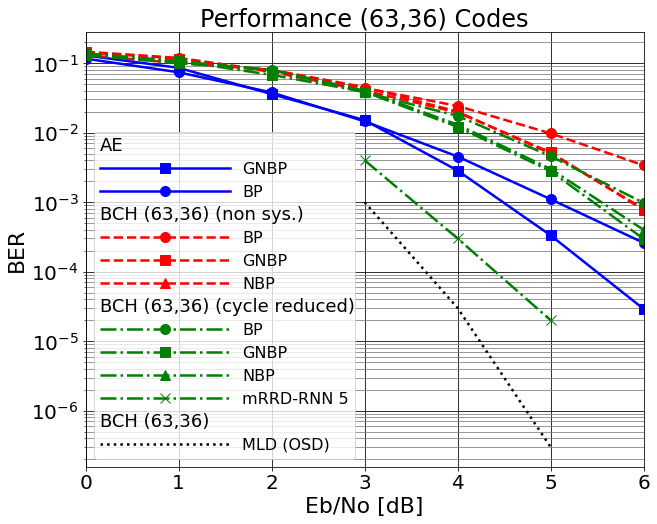

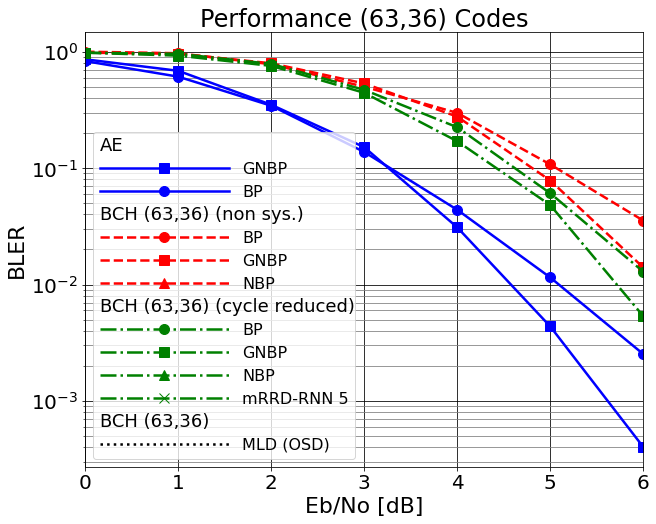

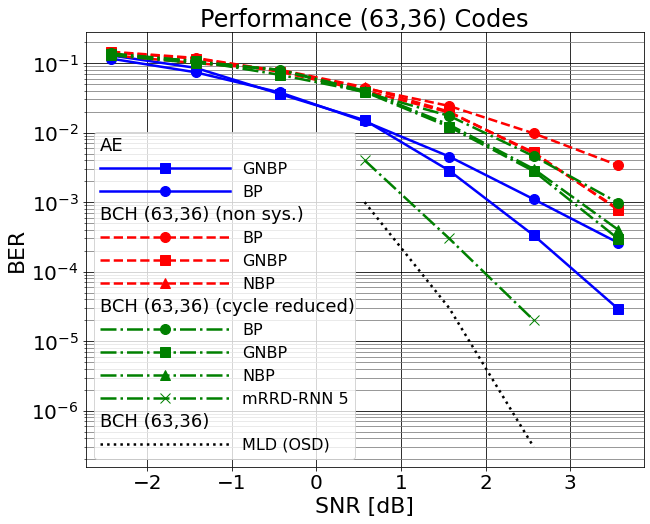

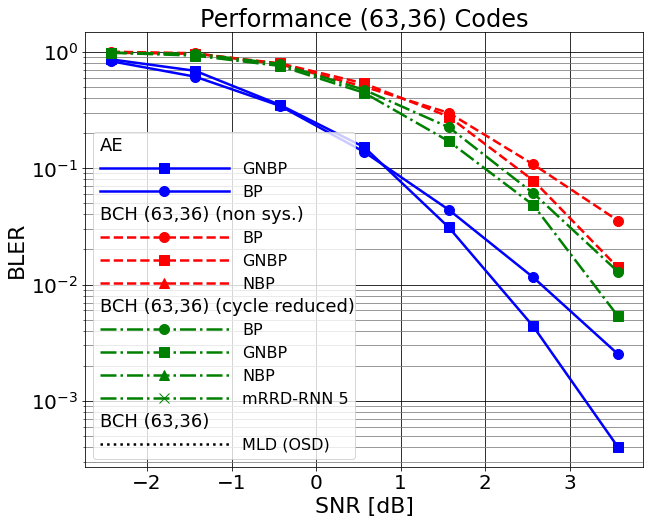

In [13]:
class LegendTitle(object):
    def __init__(self, text_props=None):
        self.text_props = text_props or {}
        super(LegendTitle, self).__init__()

    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        title = mtext.Text(x0, y0, orig_handle, usetex=False, **self.text_props)
        handlebox.add_artist(title)
        return title
 
def plot_data(plot_config):   
    data = []
    if plot_config['y'] == 'BLER':
        with open(plot_config['path'] + "/results/summary-bler.csv", newline="") as csvfile:
            csv_reader = csv.reader(csvfile, delimiter=",")
            for row in csv_reader:
                data.append(row)
        y_label = 'BLER'
    else:
        with open(plot_config['path'] + "/results/summary-ber.csv", newline="") as csvfile:
            csv_reader = csv.reader(csvfile, delimiter=",")
            for row in csv_reader:
                data.append(row)
        y_label = 'BER'
                
    data = np.array(data)        

    lines = plot_config['lines']
    if lines == []:
        lines = ["-"]
        
    markers = plot_config['markers']
    if markers == []:
        markers = ["^", "+", "s", "o", "*", "p", "x", ""]

    colors = plot_config['colors']
    if colors == []:
        colors = ["blue","orange","green","red","purple","brown","olive","black","tab:blue"]

    plots = plot_config['plot']
    if plots == []:
        plots = [True]
        
    lines = itertools.cycle(lines)
    markers = itertools.cycle(markers)
    colors = itertools.cycle(colors)
    plots = itertools.cycle(plots)
    
    
    labels = plot_config['labels']
    categories = plot_config['categories']

    legend_labels = []
    legend_categories = []
        
    if plot_config['x'] == 'SNR':
        SNR = [float(y) for y in data[1:,1]]
        x_data = SNR
        x_label = 'SNR [dB]'
    else:
        Eb_No = [float(y) for y in data[1:,0]]
        x_data = Eb_No
        x_label = 'Eb/No [dB]'
        
    plt.figure(figsize=(10,8))
    for i,name in enumerate(data[0,2:]):
        y_data = [float(y) for y in data[1:,i+2]]  
        y_data = [y if y != 0 else None for y in y_data]  
        
        line = next(lines)
        marker = next(markers)
        color = next(colors)
        plot = next(plots)
        
        if labels == []:
            label = name
        else:
            label = labels[i]
         
        if plot:     
            [line] = plt.plot(x_data,y_data,marker=marker,markersize=10,color=color,linestyle=line,linewidth=2.5,label=label)
        
            if categories == []:
                category = None
            else:
                category = categories[i]
                if category not in legend_categories:
                    legend_categories.append(category)
                    legend_categories.append(line)
                    legend_labels.append("")
                    legend_labels.append(label)
                else:
                    legend_categories.append(line)
                    legend_labels.append(label)

    if plot_config['plot_uncoded_BPSK']:
        # Uncoded BPSK REF
        SNR_dB_uncoded_BPSK =    [3.010299956,4.010299956,5.010299956,6.010299956,7.010299956,8.010299956,9.010299956,10.0102999566,11.0102999566,12.0102999566]
        Eb_No_dB_uncoded_BPSK =          [0          ,1         ,2          ,3          ,4          ,5          ,6          ,7            ,8            ,9            ]
        BER_uncoded_BPSK =  [0.077499986,0.063125014,0.037250005,0.021617651,0.012291674,0.005711551,0.002418843,0.00081869116,0.00017563792,3.4400284e-05]
        BLER_uncoded_BPSK = [1 - np.power((1-p_e),k) for p_e in BER_uncoded_BPSK]
        
        if plot_config['x'] == 'SNR':
            x_data = SNR_dB_uncoded_BPSK
        else:
            x_data = Eb_No_dB_uncoded_BPSK
        if plot_config['y'] == 'BLER':
            y_data = BLER_uncoded_BPSK
        else:
            y_data = BER_uncoded_BPSK   
        
        line = next(lines)
        marker = next(markers)
        color = next(colors)
        plot = next(plots)
        
        if labels == []:
            label = "Uncoded BPSK"
        else:
            label = labels[i+1]
        if plot:       
            [line] = plt.plot(x_data,y_data,marker=marker,markersize=10,color=color,linestyle=line,linewidth=2.5,label=label)   
            if categories == []:
                category = None
            else:
                category = categories[i+1]
                if category not in legend_categories:
                    legend_categories.append(category)
                    legend_categories.append(line)
                    legend_labels.append("")
                    legend_labels.append(label)
                else:
                    legend_categories.append(line)
                    legend_labels.append(label)
            

    title_fontsize = 24 
    ax_labels_fontsize = 22
    ticks_fontsize = 20
    legend_categories_fontsize = 18
    legend_labels_fontsize = 16
                          
    plt.grid(b=True, which="major", color="black")
    plt.grid(b=True, which="minor", color="grey")
    plt.yscale("log")
    plt.xlabel(x_label, fontsize=ax_labels_fontsize)
    plt.ylabel(y_label, fontsize=ax_labels_fontsize)
    plt.xlim(plot_config['min_x'],plot_config['max_x'])
    plt.ylim(plot_config['min_y'],plot_config['max_y'])
    plt.xticks(fontsize=ticks_fontsize)
    plt.yticks(fontsize=ticks_fontsize)
    plt.title(plot_config['title'], fontsize=title_fontsize)

    if categories == []:
        plt.legend()
    else:
        plt.legend(legend_categories,legend_labels,fontsize=legend_labels_fontsize, handler_map={str: LegendTitle({"fontsize": legend_categories_fontsize})},handlelength=0.3*max([len(txt) for txt in categories]))
        
    if plot_config['save']:
        plt.savefig(
            f"{plot_config['path']}/results/{plot_config['y']}_vs_{plot_config['x']}.png", format="png", dpi=500
        )
            
    plt.show()


plot_config['x'] = 'Eb_No'  
plot_config['y'] = 'BER'  
plot_config['min_x'] = 0
plot_config['max_x'] = 6
plot_data(plot_config)

plot_config['x'] = 'Eb_No'    
plot_config['y'] = 'BLER'  
plot_config['min_x'] = 0
plot_config['max_x'] = 6    
plot_data(plot_config)

plot_config['x'] = 'SNR'    
plot_config['y'] = 'BER'  
plot_config['min_x'] = None
plot_config['max_x'] = None  
plot_data(plot_config)

plot_config['x'] = 'SNR'    
plot_config['y'] = 'BLER'    
plot_config['min_x'] = None
plot_config['max_x'] = None  
plot_data(plot_config)


### Complexity Plots

PLOT: False - Model: AE_GNBP_0 - +: 12310 - x: 28270 - Density: 0.18694885361552027
PLOT: False - Model: AE_GNBP_0_BP - +: 12310 - x: 25090 - Density: 0.18694885361552027
PLOT: False - Model: AE_GNBP_1 - +: 12285 - x: 28555 - Density: 0.18518518518518517
PLOT: False - Model: AE_GNBP_1_BP - +: 12285 - x: 25405 - Density: 0.18518518518518517
PLOT: True - Model: AE_GNBP_2 - +: 11775 - x: 24525 - Density: 0.17930629041740154
PLOT: True - Model: AE_GNBP_2_BP - +: 11775 - x: 21475 - Density: 0.17930629041740154
PLOT: False - Model: AE_GNBP_3 - +: 8740 - x: 18390 - Density: 0.15873015873015872
PLOT: False - Model: AE_GNBP_3_BP - +: 8740 - x: 15690 - Density: 0.15873015873015872
PLOT: False - Model: AE_GNBP_4 - +: 9750 - x: 18800 - Density: 0.1657848324514991
PLOT: False - Model: AE_GNBP_4_BP - +: 9750 - x: 15980 - Density: 0.1657848324514991
PLOT: False - Model: BCH_NSYS_BP - +: 23620 - x: 38880 - Density: 0.2857142857142857
PLOT: False - Model: BCH_NSYS_GNBP_0 - +: 23620 - x: 43740 - Density

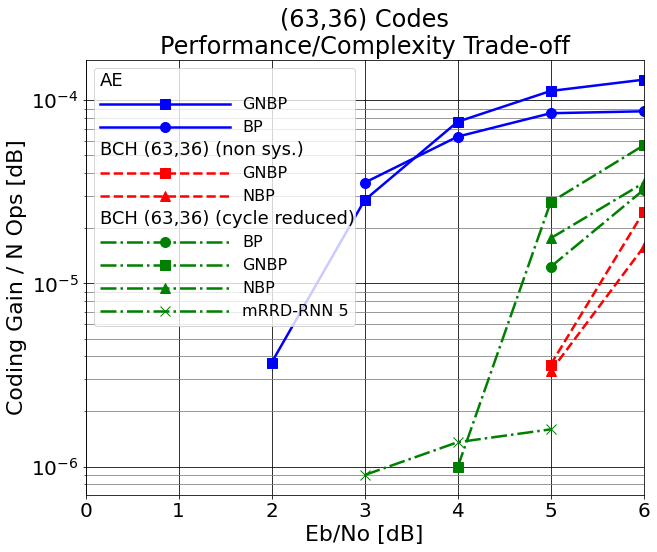

In [15]:

def variable_degree_distribution(H):
    degree = np.sum(H,axis=0)
    distribution = {}
    for d in degree:
        if d not in distribution.keys():
            distribution[d] = 1
        else:
            distribution[d] += 1
    return distribution

def check_degree_distribution(H):
    degree = np.sum(H,axis=-1)
    distribution = {}
    for d in degree:
        if d not in distribution.keys():
            distribution[d] = 1
        else:
            distribution[d] += 1
    return distribution

def BP_sum(H,n_iter=5):
    var_distribution = variable_degree_distribution(H)
    n_sum = 0
    for degree in var_distribution.keys():
        n_sum += (degree**2)*var_distribution[degree]
    return n_iter*n_sum

def BP_product(H,n_iter=5):
    check_distribution = check_degree_distribution(H)
    n_prod = 0
    for degree in check_distribution.keys():
        n_prod += (degree**2)*check_distribution[degree] - 2*degree*check_distribution[degree]
    return n_iter*n_prod

def NBP_sum(H,n_iter=5):
    return BP_sum(H,n_iter)

def NBP_product(H,n_iter=5):
    var_distribution = variable_degree_distribution(H)
    n_prod = BP_product(H,n_iter=1)
    for degree in var_distribution.keys():
        n_prod += ((degree**2)+degree+1)*var_distribution[degree] 
    return n_iter*n_prod

def GNBP_sum(H,n_iter=5):
    return BP_sum(H,n_iter)

def GNBP_product(H,n_iter=5):
    check_distribution = check_degree_distribution(H)
    n_prod = 0
    for degree in check_distribution.keys():
        n_prod += (degree**2)*check_distribution[degree]
    return n_iter*n_prod

def Perm_RNN_1_50_2_sum(H):
    return 1*50*NBP_sum(H,n_iter=2)

def Perm_RNN_1_50_2_product(H):
    return 1*50*NBP_product(H,n_iter=2)

def mRRD_RNN_5_sum(H):
    return 5*30*NBP_sum(H,n_iter=2)

def mRRD_RNN_5_product(H):
    return 5*30*NBP_product(H,n_iter=2)

def complexity(H,decoder,n_iter=5):
    if decoder == "BP":
        return (BP_sum(H,n_iter),BP_product(H,n_iter))
    elif decoder == "NBP":
        return (NBP_sum(H,n_iter),NBP_product(H,n_iter))
    elif decoder == "GNBP":
        return (GNBP_sum(H,n_iter),GNBP_product(H,n_iter))
    elif decoder == "Perm_RNN":
        return (Perm_RNN_1_50_2_sum(H),Perm_RNN_1_50_2_product(H))
    elif decoder == "mRRD_RNN":
        return (mRRD_RNN_5_sum(H),mRRD_RNN_5_product(H))
    else:
        return (-1,-1)

def remove_none(Eb_No, ER):
    out_Eb_No = []
    out_ER = []
    for i in range(len(Eb_No)):
        if ER[i] != None:
            out_Eb_No.append(Eb_No[i]) 
            out_ER.append(ER[i])   
    return (out_Eb_No,out_ER)

def coding_gain(Eb_No_A, ER_A, Eb_No_B, ER_B):  
    (Eb_No_A, ER_A) = remove_none(Eb_No_A, ER_A)
    (Eb_No_B, ER_B) = remove_none(Eb_No_B, ER_B)
    coding_gain = []
    for Eb_No_idx in range(len(Eb_No_A)):
        ER_c = ER_A[Eb_No_idx]
        Eb_No_c = Eb_No_A[Eb_No_idx]
        Eb_No_B_idx = 0  # Eb_No_idx
        
        prev_ER_B = ER_B[Eb_No_B_idx]
        next_ER_B = ER_B[Eb_No_B_idx + 1]
        prev_Eb_No_B = Eb_No_B[Eb_No_B_idx]
        next_Eb_No_B = Eb_No_B[Eb_No_B_idx + 1]

        while next_ER_B > ER_c and Eb_No_B_idx + 2 < len(Eb_No_B):
            Eb_No_B_idx += 1
            prev_ER_B = ER_B[Eb_No_B_idx]
            next_ER_B = ER_B[Eb_No_B_idx + 1]
            prev_Eb_No_B = Eb_No_B[Eb_No_B_idx]
            next_Eb_No_B = Eb_No_B[Eb_No_B_idx + 1]

        a = (next_ER_B - prev_ER_B) / (next_Eb_No_B - prev_Eb_No_B)
        b = prev_ER_B - a * prev_Eb_No_B

        delta_Eb_No_A_B = ((ER_c - b) / a) - Eb_No_c
        coding_gain.append(delta_Eb_No_A_B)
    return (Eb_No_A, np.array(coding_gain))

# Plot complexity:
class LegendTitle(object):
    def __init__(self, text_props=None):
        self.text_props = text_props or {}
        super(LegendTitle, self).__init__()

    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        title = mtext.Text(x0, y0, orig_handle, usetex=False, **self.text_props)
        handlebox.add_artist(title)
        return title
 
def plot_complexity(plot_config):   
    data = []
    if plot_config['y'] == 'BLER':
        with open(plot_config['path'] + "/results/summary-bler.csv", newline="") as csvfile:
            csv_reader = csv.reader(csvfile, delimiter=",")
            for row in csv_reader:
                data.append(row)
        y_label = 'BLER'
    else:
        with open(plot_config['path'] + "/results/summary-ber.csv", newline="") as csvfile:
            csv_reader = csv.reader(csvfile, delimiter=",")
            for row in csv_reader:
                data.append(row)
        y_label = 'BER'
                
    data = np.array(data)        

    lines = plot_config['lines']
    if lines == []:
        lines = ["-"]
        
    markers = plot_config['markers']
    if markers == []:
        markers = ["^", "+", "s", "o", "*", "p", "x", ""]

    colors = plot_config['colors']
    if colors == []:
        colors = ["blue","orange","green","red","purple","brown","olive","black","tab:blue"]

    plots = plot_config['plot']
    if plots == []:
        plots = [True]
        
    lines = itertools.cycle(lines)
    markers = itertools.cycle(markers)
    colors = itertools.cycle(colors)
    plots = itertools.cycle(plots)
    
    
    labels = plot_config['labels']
    categories = plot_config['categories']

    legend_labels = []
    legend_categories = []
        
    if plot_config['x'] == 'SNR':
        SNR = [float(y) for y in data[1:,1]]
        x_data = SNR
        x_label = 'SNR [dB]'
    else:
        Eb_No = [float(y) for y in data[1:,0]]
        x_data = Eb_No
        x_label = 'Eb/No [dB]'
        
    plt.figure(figsize=(10,8))
    for i,name in enumerate(data[0,2:]):
        y_data = [float(y) for y in data[1:,i+2]]  
        y_data = [y if y != 0 else None for y in y_data]  

        name = name.replace(" ","")
        path = os.path.join(plot_config['path'],"models",name,"matrices")
        G =  []
        with open(os.path.join(path,"G.csv"), newline="") as csvfile:
            csv_reader = csv.reader(csvfile, delimiter=" ")
            for row in csv_reader:
                G_row = []
                for elt in row:
                    G_row.append(int(elt))
                G.append(G_row)
        G = np.array(G)  
                 
        H =  []
        with open(os.path.join(path,"H.csv"), newline="") as csvfile:
            csv_reader = csv.reader(csvfile, delimiter=" ")
            for row in csv_reader:
                H_row = []
                for elt in row:
                    H_row.append(int(elt))
                H.append(H_row)
        H = np.array(H)
        
                               
        line = next(lines)
        marker = next(markers)
        color = next(colors)
        plot = next(plots)
        
        decoder = ""
        if "_BP" in name:
            decoder = "BP"  
        elif "_NBP" in name:
            decoder = "NBP"
        elif "_GNBP" in name:
            decoder = "GNBP"   
        elif "Perm_RNN" in name:
            decoder = "Perm_RNN"
        elif "mRRD_RNN" in name:
            decoder = "mRRD_RNN"
        else:
            decoder = "Unknown"    
            plot = False
        
        (n_additions, n_multplications) = complexity(H,decoder,n_iter=5)
        density = np.mean(H)
        
        if plot_config['save']:
            path = os.path.join(plot_config['path'],"models",name,"complexity_analysis_N_add.csv")
            np.savetxt(path, np.array([[n_additions]]), fmt="%i")
            path = os.path.join(plot_config['path'],"models",name,"complexity_analysis_N_mult.csv")
            np.savetxt(path, np.array([[n_multplications]]), fmt="%i")
        
        
        if labels == []:
            label = name
        else:
            label = labels[i]
        
        SNR_dB_uncoded_BPSK = [3.010299956639812,4.0102999566398125,5.0102999566398125,6.010299956639812,7.010299956639812,8.010299956639813,9.01029995663981,10.010299956639813,11.010299956639813,12.010299956639813,13,14,15]
        Eb_No_dB_uncoded_BPSK = [0,1,2,3,4,5,6,7,8,9,10,11,12]
        BER_uncoded_BPSK =  [0.077499986,0.063125014,0.037250005,0.021617651,0.012291674,0.005711551,0.002418843,0.00081869116,0.00017563792,3.4400284e-05,4e-6,2e-7,1e-8]
        BLER_uncoded_BPSK = [1 - np.power((1-p_e),k) for p_e in BER_uncoded_BPSK]
        
        ER_A = y_data
        Eb_No_A = x_data
        if plot_config['y'] == 'BLER':
            ER_B = BLER_uncoded_BPSK
            if plot_config['x'] == 'SNR':
                Eb_No_B = SNR_dB_uncoded_BPSK
                coding_g = coding_gain(Eb_No_A,ER_A,Eb_No_B,ER_B)
            else:
                Eb_No_B = Eb_No_dB_uncoded_BPSK
                coding_g = coding_gain(Eb_No_A,ER_A,Eb_No_B,ER_B)
        else:
            ER_B = BER_uncoded_BPSK
            if plot_config['x'] == 'SNR':
                Eb_No_B = SNR_dB_uncoded_BPSK
                coding_g = coding_gain(Eb_No_A,ER_A,Eb_No_B,ER_B)
            else:
                Eb_No_B = Eb_No_dB_uncoded_BPSK
                coding_g = coding_gain(Eb_No_A,ER_A,Eb_No_B,ER_B)
        
        normalized_coding_g = np.where(coding_g[1] / n_multplications > 0, coding_g[1] / n_multplications, None)    
        print(f"PLOT: {plot} - Model: {name} - +: {n_additions} - x: {n_multplications} - Density: {density}")      
        if plot:
            [line] = plt.plot(coding_g[0],normalized_coding_g,marker=marker,markersize=10,color=color,linestyle=line,linewidth=2.5, label=label)
        
            if categories == []:
                category = None
            else:
                category = categories[i]
                if category not in legend_categories:
                    legend_categories.append(category)
                    legend_categories.append(line)
                    legend_labels.append("")
                    legend_labels.append(label)
                else:
                    legend_categories.append(line)
                    legend_labels.append(label)
            
        
    title_fontsize = 24 
    ax_labels_fontsize = 22
    ticks_fontsize = 20
    legend_categories_fontsize = 18
    legend_labels_fontsize = 16
                          
    plt.grid(b=True, which="major", color="black")
    plt.grid(b=True, which="minor", color="grey")
    plt.yscale("log")
    plt.xlabel(x_label, fontsize=ax_labels_fontsize)
    plt.ylabel(f"Coding Gain / N Ops [dB]", fontsize=ax_labels_fontsize)
    plt.xlim(plot_config['min_x'],plot_config['max_x'])
    plt.ylim(plot_config['min_y'],plot_config['max_y'])
    plt.xticks(fontsize=ticks_fontsize)
    plt.yticks(fontsize=ticks_fontsize)
    plt.title(plot_config['title'], fontsize=title_fontsize)

    if categories == []:
        plt.legend()
    else:
        plt.legend(legend_categories,legend_labels,fontsize=legend_labels_fontsize, handler_map={str: LegendTitle({"fontsize": legend_categories_fontsize})},handlelength=0.3*max([len(txt) for txt in categories]))
        
    if plot_config['save']:
        plt.savefig(
            f"{plot_config['path']}/results/complexity_vs_{plot_config['x']}.png", format="png", dpi=500
        )
        
            
    plt.show()


(n,k) = (63,36)
plot_config = {
    'path':f'study-ae-{n}-{k}',
    'title':f'({n},{k}) Codes\nPerformance/Complexity Trade-off',
    'labels': ['GNBP', 'BP']*5  + ['BP'] + ['GNBP']*5 + ['NBP'] + ['BP'] + ['GNBP']*5 + ['NBP','mRRD-RNN 5'] + ['BP'] + ['GNBP']*5 + ['MLD (OSD)'] + ['Uncoded'],
    'categories': ['AE']*10 + ['BCH (63,36) (non sys.)']*7 + ['BCH (63,36) (cycle reduced)']*8 + ['BCH (63,36) (sys.)']*6 + ['BCH (63,36)'] + [' '],
    'lines':['-']*10 + ['--']*7 + ['-.']*8 + [':']*6 + [':'] + [':'],
    'colors':['blue']*10 + ['red']*7 + ['green']*8 + ['orange']*6 + ['black'] + ['black'],
    'markers':['s','o']*5 + ['o'] + ['s']*5 + ['^'] + ['o'] + ['s']*5 + ['^','x'] + ['o'] + ['s']*5 + [''] + [''],
    'plot': [False,False,False,False,True,True,False,False,False,False] + [False] + [False,True,False,False,False]+ [True] + [True] + [False,True,False,False,False] + [True, True] + [False] + [False,False,False,False,False] + [True] + [False],#[False,False,False,False,True,True,False,False,False,False] + [True] + [False,True,False,False,False]+ [True] + [True] + [False,True,False,False,False] + [True, True] + [True] + [False,True,False,False,False] + [True] + [True],
    'x':'Eb_No',    #'SNR',
    'y':'BER',      #'BLER',
    'min_x': 0,
    'max_x': 6,
    'min_y': None,
    'max_y': None,
    'save':True,
    'plot_uncoded_BPSK':False
}  


plot_config['x'] = 'Eb_No'  
plot_config['y'] = 'BER'   
plot_config['min_x'] = 0
plot_config['max_x'] = 6 
plot_complexity(plot_config)


Copyright (c) 2022 Orange

Author: Guillaume Larue <guillaume.larue@orange.com>

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), 
to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, 
and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice (including the next paragraph) shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS 
FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER 
IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE

